<a href="https://colab.research.google.com/github/NichaRoj/cubems-data-pipeline/blob/master/colab/ann_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
np.random.seed(7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Step1: Load Data**

In [0]:
#read file from the path in your google drive 
#to obtain the file path, navigate the file via left navigation pane; 
#right click at the file and click "copy paht"
path = "/content/drive/My Drive/Senior project/Senior Project- Data Pipeline & Data Analytic/Cham5 Data/Bld_Load_Sum_All.csv"
df_load = pd.read_csv(path)
df_load.head(5)

,Date,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW)
0,2018-07-01 00:00:00,169.256742,191.652042,97.396087,458.304871
1,2018-07-01 01:00:00,170.633793,192.295070,98.402265,461.331127
2,2018-07-01 02:00:00,170.600131,191.796102,97.898014,460.294247
3,2018-07-01 03:00:00,170.043723,190.105935,95.195810,455.345468
4,2018-07-01 04:00:00,169.864992,216.117156,90.437788,476.419937


In [0]:
#Change to datetime dtype
df_load['Date']=pd.to_datetime(df_load['Date'])

#set index to DateTime
df_load.set_index('Date', inplace=True)
df_load.head()

,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW)
Date,,,,
2018-07-01 00:00:00,169.256742,191.652042,97.396087,458.304871
2018-07-01 01:00:00,170.633793,192.295070,98.402265,461.331127
2018-07-01 02:00:00,170.600131,191.796102,97.898014,460.294247
2018-07-01 03:00:00,170.043723,190.105935,95.195810,455.345468
2018-07-01 04:00:00,169.864992,216.117156,90.437788,476.419937


In [0]:
#24 row per day, 1/7/2018-31/12/2019 are 549 days -> should be 13176 rows
df_load.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13176 entries, 2018-07-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AC_Load(kW)     13176 non-null  float64
 1   Light_Load(kW)  13176 non-null  float64
 2   Plug_Load(kW)   13176 non-null  float64
 3   Total_Load(kW)  13176 non-null  float64
dtypes: float64(4)
memory usage: 514.7 KB


In [0]:
path = "/content/drive/My Drive/Senior project/Senior Project- Data Pipeline & Data Analytic/Weather Data/Weatherunderground2018.csv"
df_weather1 = pd.read_csv(path)
#Change to datetime dtype
df_weather1['Time']=pd.to_datetime(df_weather1['Time'],format="%d/%m/%Y %H:%M")

#set index to DateTime
df_weather1.set_index('Time', inplace=True)
df_weather1.head(5)

,temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
Time,,,,,
2018-07-01 00:00:00,77.0,75.5,95.0,1.0,0.0
2018-07-01 00:05:00,77.1,75.9,96.0,0.0,0.0
2018-07-01 00:10:00,77.2,76.0,96.0,0.0,0.0
2018-07-01 00:15:00,77.3,76.1,96.0,0.0,0.0
2018-07-01 00:20:00,77.3,76.1,96.0,0.0,0.0


In [0]:
#Should be 52992 rows (184 days)
df_weather1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52992 entries, 2018-07-01 00:00:00 to 2018-12-31 23:55:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp(degF)      51490 non-null  float64
 1   dew(degF)       51490 non-null  float64
 2   humidity(%)     51490 non-null  float64
 3   windspeed(mph)  51490 non-null  float64
 4   solar(w/m2)     51490 non-null  float64
dtypes: float64(5)
memory usage: 2.4 MB


In [0]:
path = "/content/drive/My Drive/Senior project/Senior Project- Data Pipeline & Data Analytic/Weather Data/Weatherunderground2019.csv"
df_weather2 = pd.read_csv(path)
#Change to datetime dtype
df_weather2['Time']=pd.to_datetime(df_weather2['Time'],format="%d/%m/%Y %H:%M")

#set index to DateTime
df_weather2.set_index('Time', inplace=True)
df_weather2.head(5)

,temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
Time,,,,,
2019-01-01 00:00:00,79.2,64.1,60.0,2.0,0.0
2019-01-01 00:05:00,79.1,63.5,59.0,4.0,0.0
2019-01-01 00:10:00,79.1,64.0,60.0,3.0,0.0
2019-01-01 00:15:00,79.0,63.4,59.0,1.0,0.0
2019-01-01 00:20:00,78.9,63.8,60.0,0.0,0.0


In [0]:
#Should be 105120 rows (2019 has 365 days)
#Resample on the latter step will also reindex into correct interval
df_weather2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100479 entries, 2019-01-01 00:00:00 to 2019-12-31 23:55:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp(degF)      78835 non-null  float64
 1   dew(degF)       78835 non-null  float64
 2   humidity(%)     78835 non-null  float64
 3   windspeed(mph)  78835 non-null  float64
 4   solar(w/m2)     78835 non-null  float64
dtypes: float64(5)
memory usage: 4.6 MB


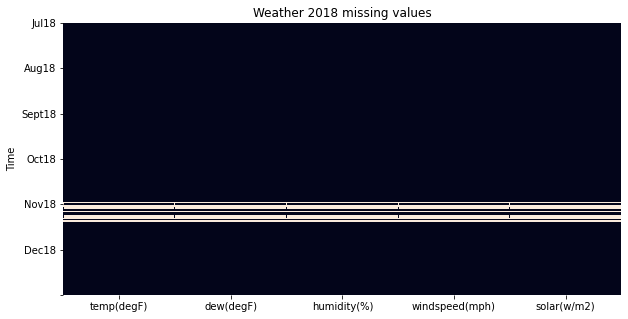

In [0]:
#The pink color indicates missing values
num_ticks=7 #tick number for Y-axis
plt.figure(figsize = (10,5))
ax = sns.heatmap(df_weather1.isnull(),cbar=False,
                 yticklabels=['Jul18','Aug18','Sept18','Oct18','Nov18','Dec18',''])
ax.set_yticks(np.linspace(0,len(df_weather1),num_ticks,dtype=np.int))
ax.set_title('Weather 2018 missing values')
plt.show()

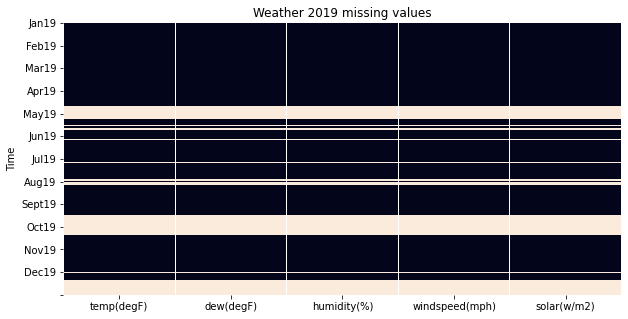

In [0]:
#The pink color indicates missing values
num_ticks=13 #tick number for Y-axis
plt.figure(figsize = (10,5))
ax = sns.heatmap(df_weather2.isnull(),cbar=False,
                 yticklabels=['Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sept19','Oct19','Nov19','Dec19',''])
ax.set_yticks(np.linspace(0,len(df_weather2),num_ticks,dtype=np.int))
ax.set_title('Weather 2019 missing values')
plt.show()

In [0]:
#Concat weather 2018 and 2019
df_weather = pd.concat([df_weather1,df_weather2])
df_weather.head()

,temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
Time,,,,,
2018-07-01 00:00:00,77.0,75.5,95.0,1.0,0.0
2018-07-01 00:05:00,77.1,75.9,96.0,0.0,0.0
2018-07-01 00:10:00,77.2,76.0,96.0,0.0,0.0
2018-07-01 00:15:00,77.3,76.1,96.0,0.0,0.0
2018-07-01 00:20:00,77.3,76.1,96.0,0.0,0.0


In [0]:
# Resampled weather data into 60-minute intervals.
df_weather=df_weather.resample('60T').mean()
df_weather.head()

,temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
Time,,,,,
2018-07-01 00:00:00,77.483333,76.258333,95.916667,0.333333,0.0
2018-07-01 01:00:00,78.166667,76.933333,95.916667,0.250000,0.0
2018-07-01 02:00:00,78.308333,76.683333,94.916667,0.833333,0.0
2018-07-01 03:00:00,78.766667,76.491667,92.833333,0.833333,0.0
2018-07-01 04:00:00,79.366667,76.166667,90.000000,0.250000,0.0


In [0]:
df_weather.describe()

,temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
count,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000
mean,84.836450,74.641111,72.705039,1.862352,171.678454
std,4.489054,4.460360,12.030189,1.995187,238.766552
min,66.833333,47.633333,24.916667,0.000000,0.000000
25%,81.808333,73.675000,64.416667,0.083333,0.000000
50%,84.441667,75.858333,73.750000,1.250000,9.633333
75%,88.033333,77.383333,82.000000,3.000000,326.041667
max,100.800000,82.616667,97.416667,11.250000,972.500000


In [0]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13176 entries, 2018-07-01 00:00:00 to 2019-12-31 23:00:00
Freq: 60T
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp(degF)      11014 non-null  float64
 1   dew(degF)       11014 non-null  float64
 2   humidity(%)     11014 non-null  float64
 3   windspeed(mph)  11014 non-null  float64
 4   solar(w/m2)     11014 non-null  float64
dtypes: float64(5)
memory usage: 617.6 KB


In [0]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13176 entries, 2018-07-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AC_Load(kW)     13176 non-null  float64
 1   Light_Load(kW)  13176 non-null  float64
 2   Plug_Load(kW)   13176 non-null  float64
 3   Total_Load(kW)  13176 non-null  float64
dtypes: float64(4)
memory usage: 514.7 KB


### **Missing Value Plot**

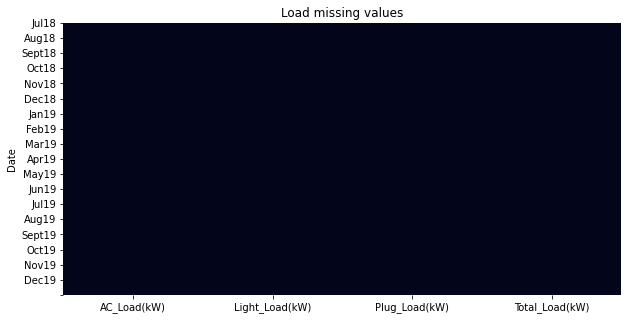

In [0]:
 #The pink color indicates missing values
num_ticks=19 #tick number for Y-axis
plt.figure(figsize = (10,5))
ax = sns.heatmap(df_load.isnull(),cbar=False,
                 yticklabels=['Jul18','Aug18','Sept18','Oct18','Nov18','Dec18','Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sept19','Oct19','Nov19','Dec19',''])
ax.set_yticks(np.linspace(0,len(df_load),num_ticks,dtype=np.int))
ax.set_title('Load missing values')
plt.show()

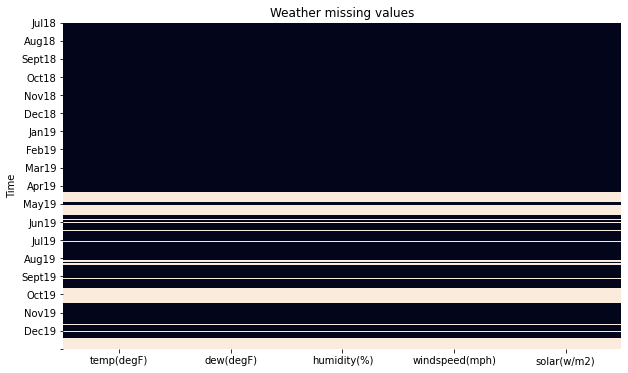

In [0]:
#The pink color indicates missing values
num_ticks=19 #tick number for Y-axis
plt.figure(figsize = (10,6))
ax = sns.heatmap(df_weather.isnull(),cbar=False,
                 yticklabels=['Jul18','Aug18','Sept18','Oct18','Nov18','Dec18','Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sept19','Oct19','Nov19','Dec19',''])
ax.set_yticks(np.linspace(0,len(df_weather),num_ticks,dtype=np.int))
ax.set_title('Weather missing values')
plt.show()

In [0]:
#Concat load and weather data
df_data = df_load.join(df_weather)
df_data.head()

,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW),temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
Date,,,,,,,,,
2018-07-01 00:00:00,169.256742,191.652042,97.396087,458.304871,77.483333,76.258333,95.916667,0.333333,0.0
2018-07-01 01:00:00,170.633793,192.295070,98.402265,461.331127,78.166667,76.933333,95.916667,0.250000,0.0
2018-07-01 02:00:00,170.600131,191.796102,97.898014,460.294247,78.308333,76.683333,94.916667,0.833333,0.0
2018-07-01 03:00:00,170.043723,190.105935,95.195810,455.345468,78.766667,76.491667,92.833333,0.833333,0.0
2018-07-01 04:00:00,169.864992,216.117156,90.437788,476.419937,79.366667,76.166667,90.000000,0.250000,0.0


In [0]:
#Drop the missing values
df_data.dropna(inplace=True)
df_data.head()

,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW),temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2)
Date,,,,,,,,,
2018-07-01 00:00:00,169.256742,191.652042,97.396087,458.304871,77.483333,76.258333,95.916667,0.333333,0.0
2018-07-01 01:00:00,170.633793,192.295070,98.402265,461.331127,78.166667,76.933333,95.916667,0.250000,0.0
2018-07-01 02:00:00,170.600131,191.796102,97.898014,460.294247,78.308333,76.683333,94.916667,0.833333,0.0
2018-07-01 03:00:00,170.043723,190.105935,95.195810,455.345468,78.766667,76.491667,92.833333,0.833333,0.0
2018-07-01 04:00:00,169.864992,216.117156,90.437788,476.419937,79.366667,76.166667,90.000000,0.250000,0.0


In [0]:
df_data['Lt-1'] = df_data['AC_Load(kW)'].shift(1)
df_data['W']=df_data.index.dayofweek
df_data['H']=df_data.index.hour
df_data.head()

,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW),temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2),Lt-1,W,H
Date,,,,,,,,,,,,
2018-07-01 00:00:00,169.256742,191.652042,97.396087,458.304871,77.483333,76.258333,95.916667,0.333333,0.0,NaN,6,0
2018-07-01 01:00:00,170.633793,192.295070,98.402265,461.331127,78.166667,76.933333,95.916667,0.250000,0.0,169.256742,6,1
2018-07-01 02:00:00,170.600131,191.796102,97.898014,460.294247,78.308333,76.683333,94.916667,0.833333,0.0,170.633793,6,2
2018-07-01 03:00:00,170.043723,190.105935,95.195810,455.345468,78.766667,76.491667,92.833333,0.833333,0.0,170.600131,6,3
2018-07-01 04:00:00,169.864992,216.117156,90.437788,476.419937,79.366667,76.166667,90.000000,0.250000,0.0,170.043723,6,4


In [0]:
df_data.shape

(11014, 12)

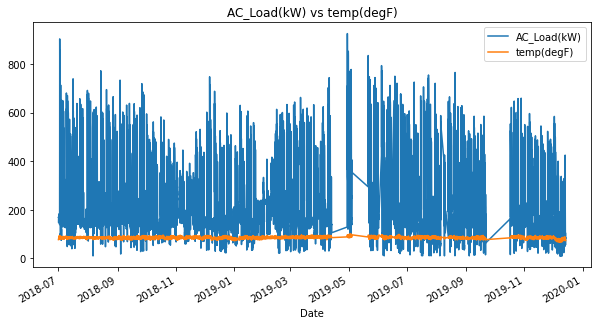

In [0]:
plt.figure(figsize=(10,5))
df_data['AC_Load(kW)'].plot()
df_data['temp(degF)'].plot()
plt.title('AC_Load(kW) vs temp(degF)')
plt.legend(['AC_Load(kW)', 'temp(degF)'], loc='upper right')

In [0]:
sns.pairplot(df_data)

In [0]:
df_data.describe()

,AC_Load(kW),Light_Load(kW),Plug_Load(kW),Total_Load(kW),temp(degF),dew(degF),humidity(%),windspeed(mph),solar(w/m2),Lt-1,W,H
count,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11014.000000,11013.000000,11014.000000,11014.000000
mean,224.522219,171.197881,57.508088,453.228187,84.836450,74.641111,72.705039,1.862352,171.678454,224.537340,2.997185,11.490013
std,146.309364,75.832475,14.906246,170.306587,4.489054,4.460360,12.030189,1.995187,238.766552,146.307400,1.980035,6.904627
min,9.373596,33.854209,29.878878,96.159106,66.833333,47.633333,24.916667,0.000000,0.000000,9.373596,0.000000,0.000000
25%,135.309076,126.041613,47.475971,327.998691,81.808333,73.675000,64.416667,0.083333,0.000000,135.319624,1.000000,6.000000
50%,165.336853,155.688012,54.148788,416.553410,84.441667,75.858333,73.750000,1.250000,9.633333,165.345153,3.000000,11.000000
75%,288.684598,202.411963,64.051024,562.693019,88.033333,77.383333,82.000000,3.000000,326.041667,288.694493,5.000000,17.000000
max,924.720030,572.041501,122.487818,1214.945954,100.800000,82.616667,97.416667,11.250000,972.500000,924.720030,6.000000,23.000000


# **Step2: Prepare Data**

**Normalize the dataset**

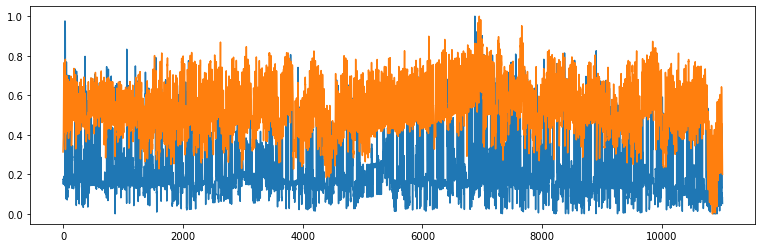

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(df_data)

plt.figure(figsize=(13,4))
plt.plot(data[:,0])
plt.plot(data[:,4])

**Split into train vs test datasets**

## AC Load Data

In [0]:
# split into train and test sets
n = int(len(data)*0.8)
trainY = data[1:n,0]  #(starting from row1 to remove nan value) 
trainX = data[1:n,4:] #start from tempF feature
testY = data[n:len(data),0]
testX = data[n:len(data),4:] 

print(trainY.shape)
print(trainX.shape)
print('=====AC_Load(kW) Train Data=======')
for i in range(5):
  print(trainX[i], trainY[i])

print(testY.shape)
print(testX.shape)
print('=====AC_Load(kW) Test Data=======')
for i in range(5):
  print(testX[i,:], testY[i])

(8810,)
(8810, 8)
=====AC_Load(kW) Train Data=======
[0.33366045 0.83754169 0.97931034 0.02222222 0.         0.17466955
 1.         0.04347826] 0.17617394952459978
[0.33783121 0.83039543 0.96551724 0.07407407 0.         0.17617395
 1.         0.08695652] 0.1761371744812737
[0.35132483 0.82491663 0.93678161 0.07407407 0.         0.17613717
 1.         0.13043478] 0.17552930895721955
[0.36898921 0.81562649 0.89770115 0.02222222 0.         0.17552931
 1.         0.17391304] 0.17533404807827402
[0.37782139 0.824202   0.89770115 0.01481481 0.         0.17533405
 1.         0.2173913 ] 0.15032950486935484
(2203,)
(2203, 8)
=====AC_Load(kW) Test Data=======
[0.76422964 0.87541687 0.52298851 0.05185185 0.67883462 0.15523241
 0.66666667 0.56521739] 0.5832170690394529
[0.74730128 0.88899476 0.55287356 0.01481481 0.48054841 0.58321707
 0.66666667 0.60869565] 0.5001324029849289
[0.75171737 0.90471653 0.56436782 0.01481481 0.50145673 0.5001324
 0.66666667 0.65217391] 0.4988581920399182
[0.69504416 

## Light Load Data

In [0]:
# split into train and test sets
n = int(len(data)*0.8)
trainY = data[1:n,1]  #(starting from row1 to remove nan value) 
trainX = data[1:n,4:] #start from tempF feature
testY = data[n:len(data),1]
testX = data[n:len(data),4:] 

print(trainY.shape)
print(trainX.shape)
print('=====Light_Load(kW) Train Data=======')
for i in range(5):
  print(trainX[i], trainY[i])

print(testY.shape)
print(testX.shape)
print('=====Light_Load(kW) Test Data=======')
for i in range(5):
  print(testX[i,:], testY[i])

(8810,)
(8810, 8)
=====Light_Load(kW) Train Data=======
[0.33366045 0.83754169 0.97931034 0.02222222 0.         0.17466955
 1.         0.04347826] 0.29439725331723265
[0.33783121 0.83039543 0.96551724 0.07407407 0.         0.17617395
 1.         0.08695652] 0.2934701268829348
[0.35132483 0.82491663 0.93678161 0.07407407 0.         0.17613717
 1.         0.13043478] 0.29032964622298557
[0.36898921 0.81562649 0.89770115 0.02222222 0.         0.17552931
 1.         0.17391304] 0.33866081535508114
[0.37782139 0.824202   0.89770115 0.01481481 0.         0.17533405
 1.         0.2173913 ] 0.3387824005344354
(2203,)
(2203, 8)
=====Light_Load(kW) Test Data=======
[0.76422964 0.87541687 0.52298851 0.05185185 0.67883462 0.15523241
 0.66666667 0.56521739] 0.16522176125942797
[0.74730128 0.88899476 0.55287356 0.01481481 0.48054841 0.58321707
 0.66666667 0.60869565] 0.1678572875292984
[0.75171737 0.90471653 0.56436782 0.01481481 0.50145673 0.5001324
 0.66666667 0.65217391] 0.16914215000937521
[0.69

## Plug Load Data

In [0]:
# split into train and test sets
n = int(len(data)*0.8)
trainY = data[1:n,2]  #(starting from row1 to remove nan value) 
trainX = data[1:n,4:] #start from tempF feature
testY = data[n:len(data),2]
testX = data[n:len(data),4:] 

print(trainY.shape)
print(trainX.shape)
print('=====Plug_Load(kW) Train Data=======')
for i in range(5):
  print(trainX[i], trainY[i])

print(testY.shape)
print(testX.shape)
print('=====Plug_Load(kW) Test Data=======')
for i in range(5):
  print(testX[i,:], testY[i])

(8810,)
(8810, 8)
=====Plug_Load(kW) Train Data=======
[0.33366045 0.83754169 0.97931034 0.02222222 0.         0.17466955
 1.         0.04347826] 0.7399219378852859
[0.33783121 0.83039543 0.96551724 0.07407407 0.         0.17617395
 1.         0.08695652] 0.7344769926733914
[0.35132483 0.82491663 0.93678161 0.07407407 0.         0.17613717
 1.         0.13043478] 0.7052983369730415
[0.36898921 0.81562649 0.89770115 0.02222222 0.         0.17552931
 1.         0.17391304] 0.6539207806234956
[0.37782139 0.824202   0.89770115 0.01481481 0.         0.17533405
 1.         0.2173913 ] 0.7043947581701757
(2203,)
(2203, 8)
=====Plug_Load(kW) Test Data=======
[0.76422964 0.87541687 0.52298851 0.05185185 0.67883462 0.15523241
 0.66666667 0.56521739] 0.30724119462579713
[0.74730128 0.88899476 0.55287356 0.01481481 0.48054841 0.58321707
 0.66666667 0.60869565] 0.3243496512420876
[0.75171737 0.90471653 0.56436782 0.01481481 0.50145673 0.5001324
 0.66666667 0.65217391] 0.28596453248457554
[0.6950441

## Total Load Data

In [0]:
# split into train and test sets
n = int(len(data)*0.8)
trainY = data[1:n,3]  #(starting from row1 to remove nan value) 
trainX = data[1:n,4:] #start from tempF feature
testY = data[n:len(data),3]
testX = data[n:len(data),4:] 

print(trainY.shape)
print(trainX.shape)
print('=====Total_Load(kW) Train Data=======')
for i in range(5):
  print(trainX[i], trainY[i])

print(testY.shape)
print(testX.shape)
print('=====Total_Load(kW) Test Data=======')
for i in range(5):
  print(testX[i,:], testY[i])

(8810,)
(8810, 8)
=====Total_Load(kW) Train Data=======
[0.33366045 0.83754169 0.97931034 0.02222222 0.         0.17466955
 1.         0.04347826] 0.3263999942925889
[0.33783121 0.83039543 0.96551724 0.07407407 0.         0.17617395
 1.         0.08695652] 0.32547320455071466
[0.35132483 0.82491663 0.93678161 0.07407407 0.         0.17613717
 1.         0.13043478] 0.3210498609041352
[0.36898921 0.81562649 0.89770115 0.02222222 0.         0.17552931
 1.         0.17391304] 0.33988675435712107
[0.37782139 0.824202   0.89770115 0.01481481 0.         0.17533405
 1.         0.2173913 ] 0.32366557484090613
(2203,)
(2203, 8)
=====Total_Load(kW) Test Data=======
[0.76422964 0.87541687 0.52298851 0.05185185 0.67883462 0.15523241
 0.66666667 0.56521739] 0.5614713620981611
[0.74730128 0.88899476 0.55287356 0.01481481 0.48054841 0.58321707
 0.66666667 0.60869565] 0.49617880870778214
[0.75171737 0.90471653 0.56436782 0.01481481 0.50145673 0.5001324
 0.66666667 0.65217391] 0.4925770029196585
[0.695

# **Step 3: Formulate ANN model**

In [0]:
from tensorflow.python.keras.optimizers import Adam
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
opt = Adam(lr=0.005)

model = Sequential()
model.add(Dense(6, activation='sigmoid', input_dim=8))#add each layer to model
model.add(Dense(6, activation='sigmoid'))#add layer2 to model
model.add(Dense(1, activation='sigmoid'))#add layer2 to model
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(trainX, trainY, validation_split=0.1, epochs=400, batch_size=24, verbose=1)

Train on 7929 samples, validate on 881 samples
Epoch 1/400
7929/7929 [==============================] - 1s 64us/sample - loss: 0.0288 - val_loss: 0.0110
Epoch 2/400
7929/7929 [==============================] - 0s 54us/sample - loss: 0.0261 - val_loss: 0.0092
Epoch 3/400
7929/7929 [==============================] - 0s 52us/sample - loss: 0.0254 - val_loss: 0.0118
Epoch 4/400
7929/7929 [==============================] - 0s 52us/sample - loss: 0.0251 - val_loss: 0.0106
Epoch 5/400
7929/7929 [==============================] - 0s 51us/sample - loss: 0.0250 - val_loss: 0.0111
Epoch 6/400
7929/7929 [==============================] - 0s 51us/sample - loss: 0.0248 - val_loss: 0.0108
Epoch 7/400
7929/7929 [==============================] - 0s 54us/sample - loss: 0.0248 - val_loss: 0.0122
Epoch 8/400
7929/7929 [==============================] - 0s 51us/sample - loss: 0.0248 - val_loss: 0.0109
Epoch 9/400
7929/7929 [==============================] - 0s 53us/sample - loss: 0.0248 - val_loss: 0.0089

In [0]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
None


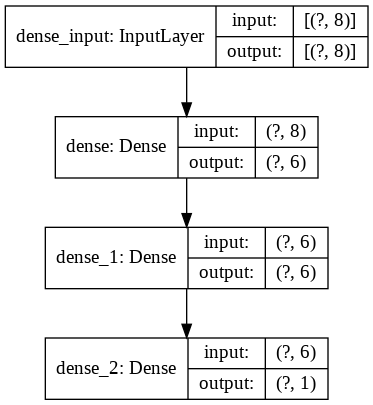

In [0]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# **Step 4: Predict and calculate RMSE**

## AC Load

In [0]:
#predict the load
testPredict = model.predict(testX)

#denormalize the test set
testY_dn = testY*(df_data['AC_Load(kW)'].max()-df_data['AC_Load(kW)'].min())+df_data['AC_Load(kW)'].min()  

#denormalize the prediction
testPredict_dn = testPredict*(df_data['AC_Load(kW)'].max()-df_data['AC_Load(kW)'].min())+df_data['AC_Load(kW)'].min()  

RMSE= 84.30410488380898
MAPE= 32.14763916385645


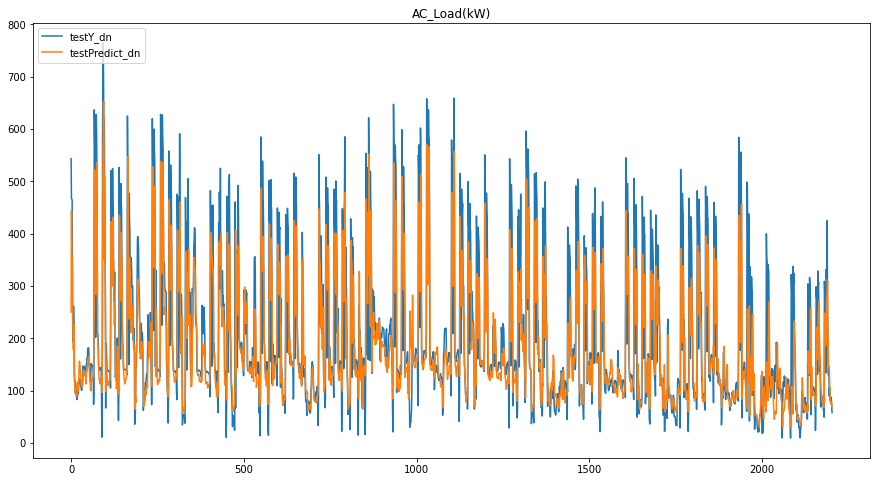

In [0]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_dn, label='testY_dn')
plt.plot(testPredict_dn, label='testPredict_dn')
plt.title('AC_Load(kW)')
plt.legend(loc='upper left')

#calculate RMSE and MAPE
RMSE = np.sqrt(np.mean(np.square(testY_dn-testPredict_dn.ravel())))
MAPE = np.mean(np.abs((testY_dn-testPredict_dn.ravel())/testY_dn))*100

print('RMSE=',RMSE)
print('MAPE=',MAPE)

## Light Load

In [0]:
#predict the load
testPredict = model.predict(testX)

#denormalize the test set
testY_dn = testY*(df_data['Light_Load(kW)'].max()-df_data['Light_Load(kW)'].min())+df_data['Light_Load(kW)'].min()  

#denormalize the prediction
testPredict_dn = testPredict*(df_data['Light_Load(kW)'].max()-df_data['Light_Load(kW)'].min())+df_data['Light_Load(kW)'].min()  

RMSE= 42.74850901106249
MAPE= 23.887475794510404


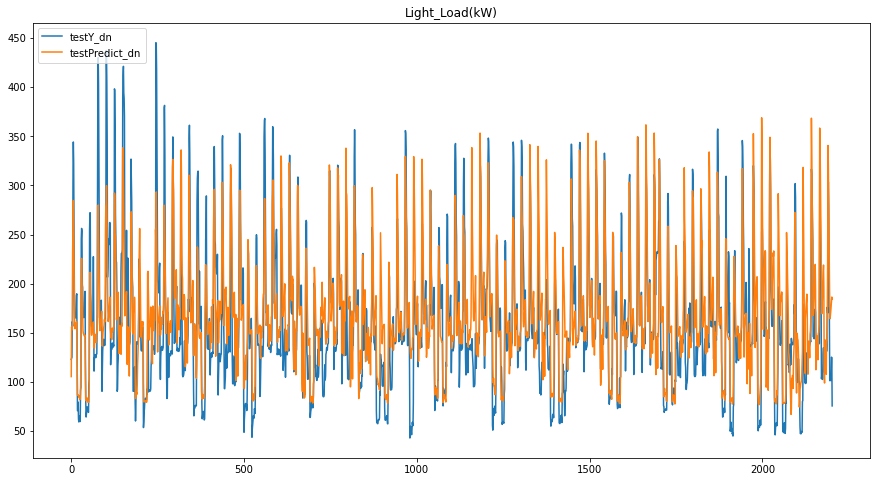

In [0]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_dn, label='testY_dn')
plt.plot(testPredict_dn, label='testPredict_dn')
plt.title('Light_Load(kW)')
plt.legend(loc='upper left')

#calculate RMSE and MAPE
RMSE = np.sqrt(np.mean(np.square(testY_dn-testPredict_dn.ravel())))
MAPE = np.mean(np.abs((testY_dn-testPredict_dn.ravel())/testY_dn))*100

print('RMSE=',RMSE)
print('MAPE=',MAPE)

## Plug Load

In [0]:
#predict the load
testPredict = model.predict(testX)

#denormalize the test set
testY_dn = testY*(df_data['Plug_Load(kW)'].max()-df_data['Plug_Load(kW)'].min())+df_data['Plug_Load(kW)'].min()  

#denormalize the prediction
testPredict_dn = testPredict*(df_data['Plug_Load(kW)'].max()-df_data['Plug_Load(kW)'].min())+df_data['Plug_Load(kW)'].min()  

RMSE= 11.13123332146073
MAPE= 17.133328382370784


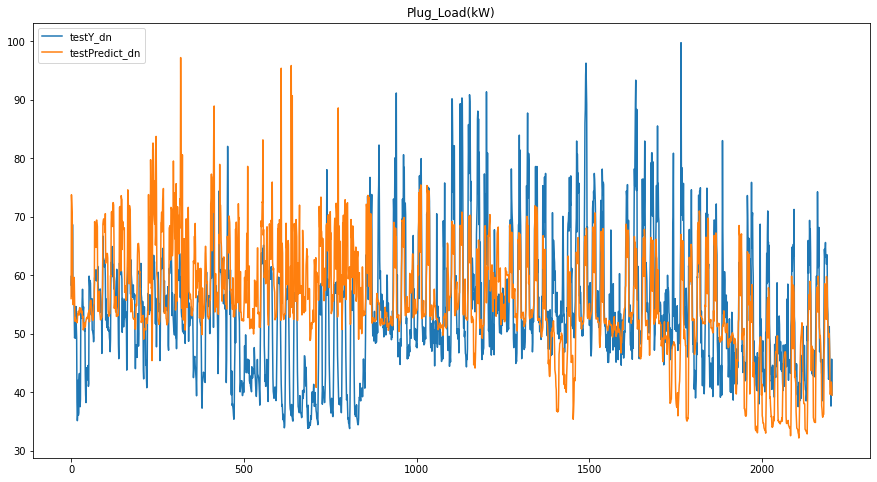

In [0]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_dn, label='testY_dn')
plt.plot(testPredict_dn, label='testPredict_dn')
plt.title('Plug_Load(kW)')
plt.legend(loc='upper left')

#calculate RMSE and MAPE
RMSE = np.sqrt(np.mean(np.square(testY_dn-testPredict_dn.ravel())))
MAPE = np.mean(np.abs((testY_dn-testPredict_dn.ravel())/testY_dn))*100

print('RMSE=',RMSE)
print('MAPE=',MAPE)

## Total Load

In [0]:
#predict the load
testPredict = model.predict(testX)

#denormalize the test set
testY_dn = testY*(df_data['Total_Load(kW)'].max()-df_data['Total_Load(kW)'].min())+df_data['Total_Load(kW)'].min()  

#denormalize the prediction
testPredict_dn = testPredict*(df_data['Total_Load(kW)'].max()-df_data['Total_Load(kW)'].min())+df_data['Total_Load(kW)'].min()  

RMSE= 91.25013733215441
MAPE= 17.48873377868399


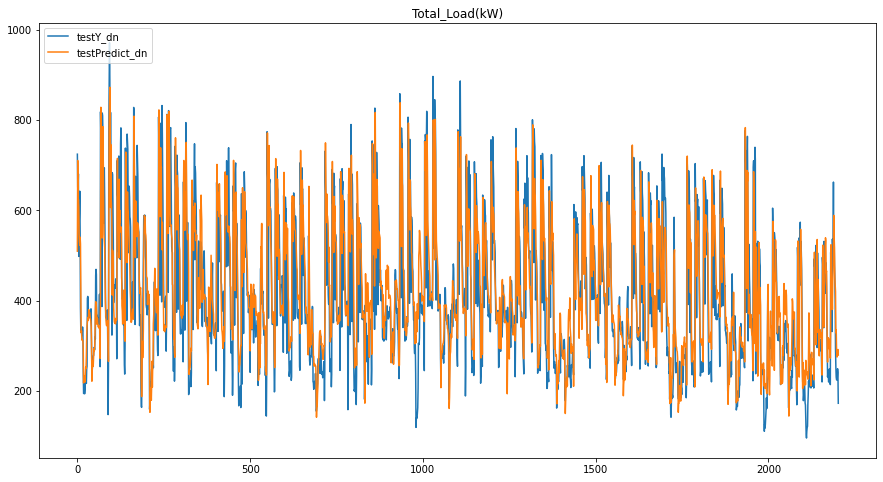

In [0]:
#plot testY vs testPredict
plt.figure(figsize=(15,8))
plt.plot(testY_dn, label='testY_dn')
plt.plot(testPredict_dn, label='testPredict_dn')
plt.title('Total_Load(kW)')
plt.legend(loc='upper left')

#calculate RMSE and MAPE
RMSE = np.sqrt(np.mean(np.square(testY_dn-testPredict_dn.ravel())))
MAPE = np.mean(np.abs((testY_dn-testPredict_dn.ravel())/testY_dn))*100

print('RMSE=',RMSE)
print('MAPE=',MAPE)

# Validation loss: AC_Load(kW)


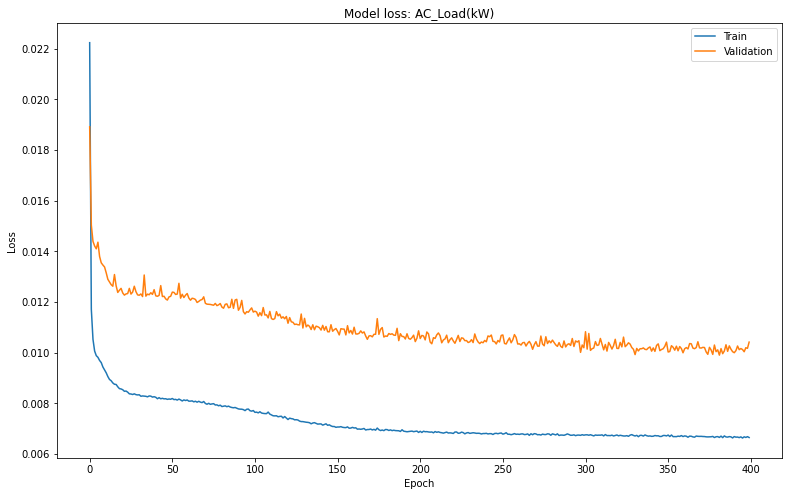

In [0]:
#Check model loss and validation loss
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: AC_Load(kW)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Validation loss: Light_Load(kW)


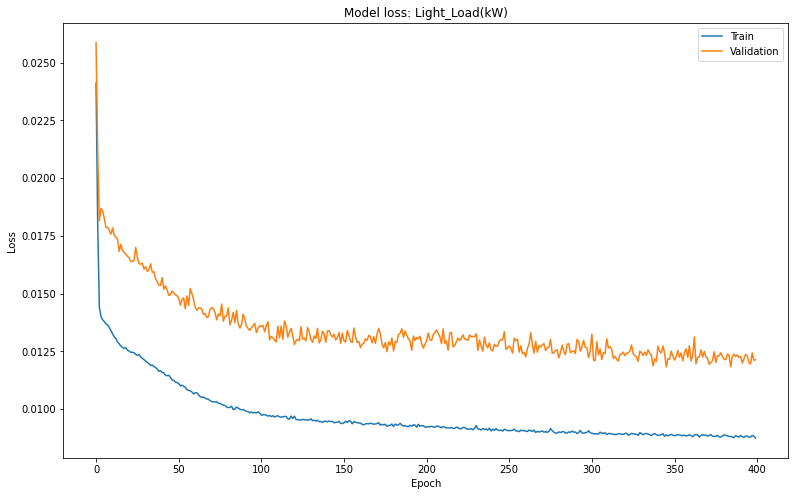

In [0]:
#Check model loss and validation loss
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: Light_Load(kW)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Validation loss: Plug_Load(kW)


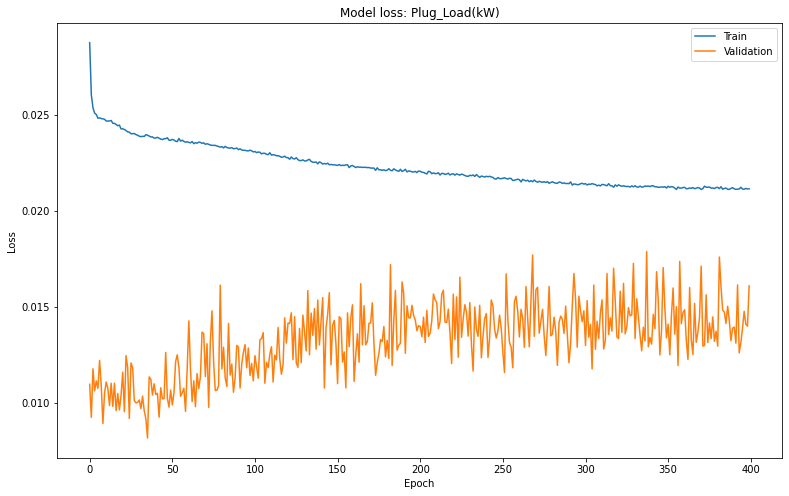

In [0]:
#Check model loss and validation loss
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: Plug_Load(kW)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Validation loss: Total_Load(kW)


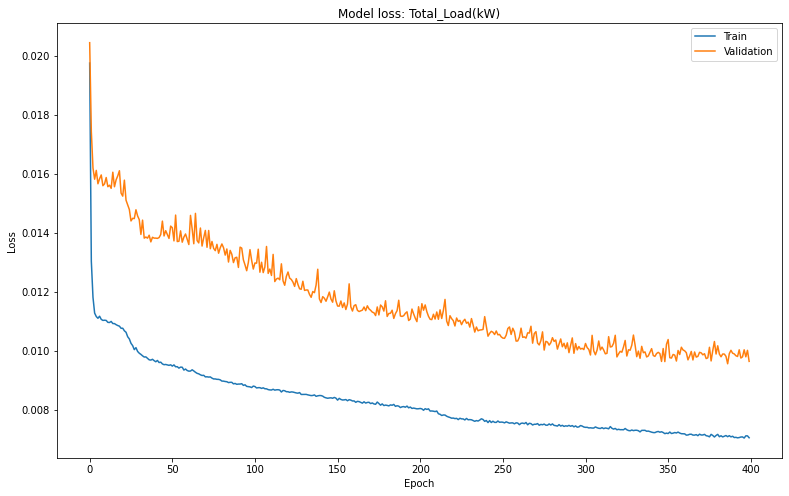

In [0]:
#Check model loss and validation loss
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss: Total_Load(kW)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()